## Dependencies

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [211]:
titanic_data=pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
titanic_data.info()
# titanic_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [215]:
test_data.info()
# test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Analayzing Data

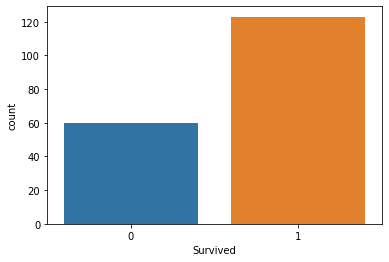

In [216]:
sns.countplot(x="Survived", data=titanic_data)

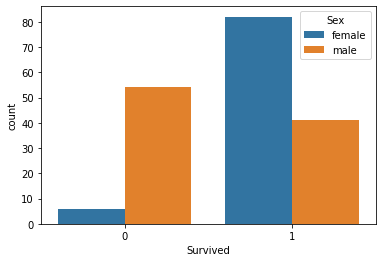

In [217]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

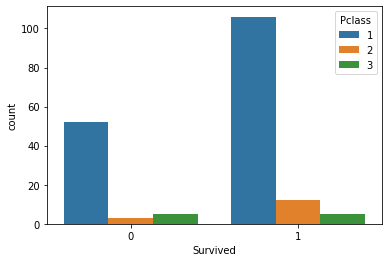

In [218]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

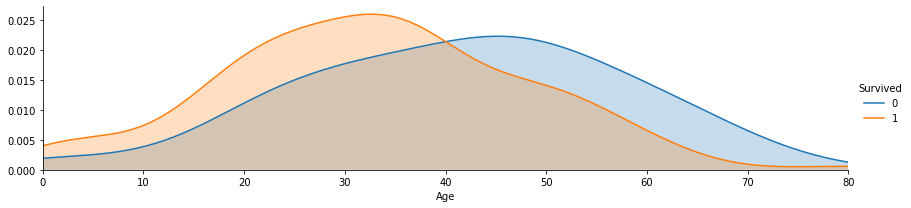

In [219]:
facet = sns.FacetGrid(titanic_data, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.show() 

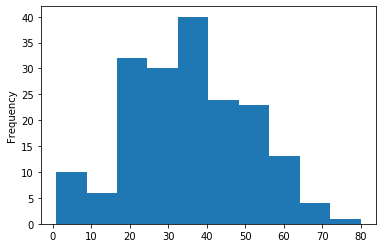

In [220]:
titanic_data["Age"].plot.hist()

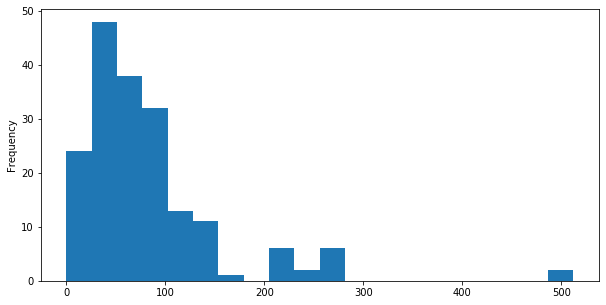

In [221]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

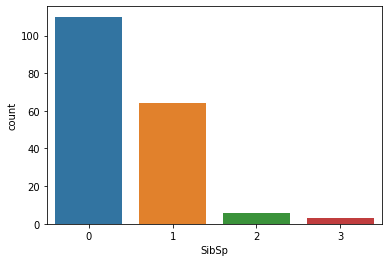

In [222]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [223]:
titanic_data.isnull().head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,False,False


In [224]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [225]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

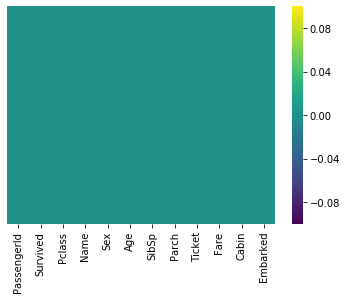

In [226]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

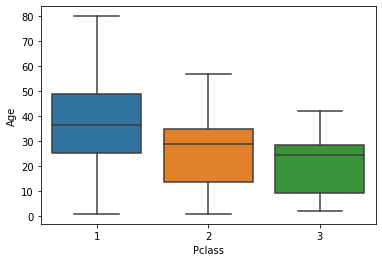

In [227]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [228]:
# # fill missing age with median age for each title (Mr, Mrs, Miss, Others)
# age_mean = titanic_data['Age'].mean()
# age_mean

In [229]:
# titanic_data['Age']=titanic_data['Age'].fillna(age_mean)
# titanic_data.head(20)

In [230]:
titanic_data.drop("Cabin", axis= 1, inplace=True)

In [231]:
test_data.drop("Cabin", axis= 1, inplace=True)
test_data.dropna(inplace=True)

In [232]:
# test_data

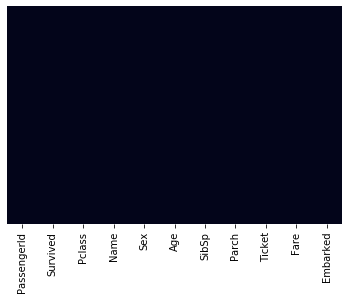

In [233]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

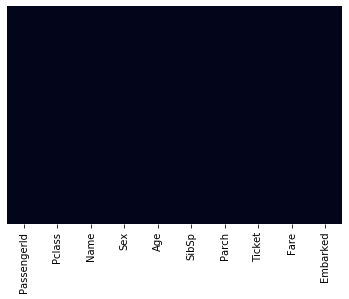

In [234]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [235]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [236]:
pd.get_dummies(test_data["Sex"]).head()
pd.get_dummies(titanic_data["Sex"]).head()

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [237]:
sex=pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex_test=pd.get_dummies(test_data["Sex"], drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [238]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark_test=pd.get_dummies(test_data["Embarked"],drop_first=True)
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [239]:
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head()
Pcl_test=pd.get_dummies(test_data["Pclass"],drop_first=True)
Pcl_test.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [240]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0


In [241]:
test_data=pd.concat([test_data,sex_test,embark_test,Pcl_test],axis=1)
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,0,0,0,0,0
1,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,0,0,1,0,0


In [242]:
titanic_data.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass"],axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


In [243]:
test_data.drop(["Sex","Embarked","Name","Ticket","Pclass"],axis=1, inplace=True)
test_data.head(2)

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1235,58.0,0,1,512.3292,0,0,0,0,0
1,945,28.0,3,2,263.0000,0,0,1,0,0


In [244]:
# test_data.head()
train_data = titanic_data.drop('Survived', axis=1)
target = titanic_data['Survived']

train_data.shape, target.shape

((183, 9), (183,))

In [245]:
test_data.shape

(418, 10)

In [246]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [247]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [248]:
clf = KNeighborsClassifier(n_neighbors = 9)
scoring = 'accuracy'
knn_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(knn_score)

[0.84210526 0.73684211 0.63157895 0.66666667 0.77777778 0.66666667
 0.38888889 0.66666667 0.66666667 0.72222222]


In [249]:
# kNN Score
knn=round(np.mean(knn_score)*100, 2)
knn

67.66

In [250]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
decT_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=2, scoring=scoring)
print(decT_score)

[0.78947368 0.84210526 0.52631579 0.88888889 0.83333333 0.72222222
 0.61111111 0.72222222 0.72222222 0.77777778]


In [251]:
# decision tree Score
decT=round(np.mean(decT_score)*100, 2)
decT

74.36

In [252]:
clf = RandomForestClassifier(n_estimators=9)
scoring = 'accuracy'
RF_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(RF_score)

[0.73684211 0.84210526 0.68421053 0.88888889 0.83333333 0.72222222
 0.66666667 0.61111111 0.66666667 0.77777778]


In [253]:
# Random Forest Score
RF=round(np.mean(RF_score)*100, 2)
RF

74.3

In [254]:
clf = GaussianNB()
scoring = 'accuracy'
GNB_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(GNB_score)

[0.78947368 0.89473684 0.68421053 0.88888889 0.72222222 0.72222222
 0.72222222 0.61111111 0.66666667 0.66666667]


In [255]:
# Naive Bayes Score
GNB=round(np.mean(GNB_score)*100, 2)
GNB

73.68

In [256]:
clf = SVC()
scoring = 'accuracy'
SVC_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(SVC_score)

[0.84210526 0.78947368 0.57894737 0.66666667 0.77777778 0.61111111
 0.44444444 0.72222222 0.55555556 0.72222222]


C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cesur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [257]:
SVC=round(np.mean(SVC_score)*100,2)
SVC

67.11

In [258]:
test_data.head(1)


,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1235,58.0,0,1,512.3292,0,0,0,0,0


In [259]:
train_data.head(1)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,38.0,1,0,71.2833,0,0,0,0,0


In [260]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [SVC, knn,  
              RF, GNB, decT]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
74.36,Decision Tree
74.30,Random Forest
73.68,Naive Bayes
67.66,KNN
67.11,Support Vector Machines
